In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
XOR=np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
X=XOR[:,0:2]
y=XOR[:,-1]

In [3]:
print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 1 1 0]


In [4]:
def print_net(net):
    for i,layer in enumerate(net,1):
        print('Layer {}'.format(i))
        for j,neuron in enumerate(layer,1):
            print("neuron {} :".format(j),neuron)

In [7]:
def initialize_network():
    #Defining the network architecture
    input_neurons=len(X[0])
    #hidden_neurons=input_neurons+1
    hidden_neurons=input_neurons+2

    output_neurons=2
    n_hidden_layers=1
    
    net=list()
    
    for h in range(n_hidden_layers):
        if h!=0:
            input_neurons=len(net[-1])
            
        hidden_layer = [ { 'weights': np.random.uniform(size=input_neurons)} for i in range(hidden_neurons) ]
        net.append(hidden_layer)
    
    output_layer = [ { 'weights': np.random.uniform(size=hidden_neurons)} for i in range(output_neurons)]
    net.append(output_layer)
    
    return net

In [8]:
a=initialize_network()
print_net(a)

Layer 1
neuron 1 : {'weights': array([0.13794267, 0.54887704])}
neuron 2 : {'weights': array([0.70450198, 0.14598199])}
neuron 3 : {'weights': array([0.2149439 , 0.90608063])}
neuron 4 : {'weights': array([0.88216961, 0.80361951])}
Layer 2
neuron 1 : {'weights': array([0.46729358, 0.0097483 , 0.66347136, 0.78404881])}
neuron 2 : {'weights': array([0.17799491, 0.79288545, 0.68965088, 0.49142997])}
neuron 3 : {'weights': array([0.10136913, 0.72870969, 0.50692466, 0.36420286])}
neuron 4 : {'weights': array([0.14009786, 0.68865908, 0.68047977, 0.50717349])}
Layer 3
neuron 1 : {'weights': array([0.59666528, 0.56918362, 0.15634789, 0.15824366])}
neuron 2 : {'weights': array([0.89924399, 0.36794389, 0.13366703, 0.8406472 ])}


In [9]:
def activate_sigmoid(sum):
    return (1/(1+np.exp(-sum)))

In [10]:
#doubt what is neuron['result']
def forward_prop(net,input):
    row = input
    for layer in net:
        prev_input = np.array([])
        for neuron in layer:
            #print(neuron['weights'])
            #print(row)
            sum=neuron['weights'].T.dot(row)
            #sum = np.matmul(neuron['weights'],row)
            #print("sum = ",sum)
            result=activate_sigmoid(sum)
            neuron['result']=result
            prev_input=np.append(prev_input,[result])
        row =prev_input
    return row

In [11]:
def sigmoidDerivative(sigma):
    return sigma*(1.0-sigma)

In [12]:
def back_propagation(net,row,expected):
    for i in reversed(range(len(net))):
        layer=net[i]
        errors=np.array([])
        if i == len(net)-1:
            results=[neuron['result'] for neuron in layer]
            errors = expected-np.array(results)
        else:
            for j in range(len(layer)):
                herror=0
                nextlayer=net[i+1]
                for neuron in nextlayer:
                    herror+=(neuron['weights'][j]*neuron['delta'])
                errors=np.append(errors,[herror])
        for j in range(len(layer)):
                neuron=layer[j]
                neuron['delta']=errors[j]*sigmoidDerivative(neuron['result'])

In [13]:
def updateWeights(net,input,lrate):
    for i in range(len(net)):
        inputs = input
        if i!=0:
            inputs=[neuron['result'] for neuron in net[i-1]]
        for neuron in net[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]

In [14]:
def training(net, epochs,lrate,n_outputs):
    errors=[]
    for epoch in range(epochs):
        sum_error = 0
        for i, row in enumerate(X):
            outputs = forward_prop(net,row)
            expected=[0.0 for i in range(n_outputs)]
            expected[y[i]]=1
            sum_error+=sum([(expected[j]-outputs[j])**2 for j in range(len(expected))])
            back_propagation(net,row,expected)
            updateWeights(net,row,0.05)
        if epoch%10000 ==0:
            print('>epoch=%d,error=%.3f'%(epoch,sum_error))
            errors.append(sum_error)
    return errors

In [15]:
errors=training(a,30000, 0.05,2)

>epoch=0,error=2.761
>epoch=10000,error=1.989
>epoch=20000,error=0.012


In [16]:
print_net(a)

Layer 1
neuron 1 : {'weights': array([-0.79641455,  2.10695679]), 'result': 0.7875963687628754, 'delta': 0.0004488927349247362}
neuron 2 : {'weights': array([ 4.95900539, -2.32319809]), 'result': 0.9331283962064614, 'delta': 0.00038917405951896316}
neuron 3 : {'weights': array([-1.91879192,  4.26625387]), 'result': 0.9127292359905997, 'delta': 0.000381922551605905}
neuron 4 : {'weights': array([4.84444661, 4.81524247]), 'result': 0.9999361997182107, 'delta': -6.757813124041413e-07}
Layer 2
neuron 1 : {'weights': array([-0.93084975, -2.23686926, -1.59622628,  3.75527384]), 'result': 0.37233609845696175, 'delta': -0.0006037721087549008}
neuron 2 : {'weights': array([ 1.29878817,  3.44911277,  2.81440895, -5.69047752]), 'result': 0.7539824074743772, 'delta': 0.0005944256071797981}
neuron 3 : {'weights': array([ 1.19138915,  3.17425018,  2.56916033, -5.25043018]), 'result': 0.7300889474739114, 'delta': 0.0005739301936298015}
neuron 4 : {'weights': array([-1.14995839, -1.75239206, -1.181043

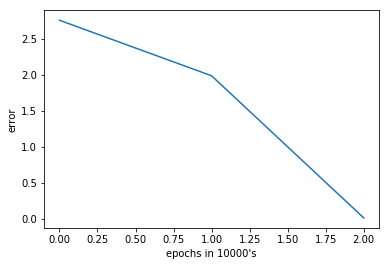

In [17]:
epochs=[0,1,2]
plt.plot(epochs,errors)
plt.xlabel("epochs in 10000's")
plt.ylabel('error')
plt.show()

In [18]:
def predict(network, row):
    outputs = forward_prop(a, row)
    return outputs

In [22]:
pred=predict(a,np.array([0,0]))
output=np.argmax(pred)
print(output)

0
